<a href="https://colab.research.google.com/github/Mumo-vicky/Autolib-Hypothesis-Testing/blob/master/Hypothesis_Testing_for_Autolib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading our Environment**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Exploration of Our data**

## **Loading our Dataset**

In [180]:
#loading our data to the environment and viewing the top
autolib = pd.read_csv("autolib_daily_events_postal_code.csv")
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [161]:
#viewing the bottom of the dataset
autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [162]:
#checking for null values
autolib.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [163]:
#checking for the number of rows and columns
autolib.shape

(16085, 13)

## **Cleaning up the data**

In [181]:
#dropping the columns not needed and viewing the top of the data.
autolib.drop(["Postal code","n_daily_data_points","Utilib_taken_sum","Utilib_returned_sum","Utilib_14_returned_sum","Utilib_14_taken_sum"],axis=1,inplace=True)
autolib.head()

,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
0,1/1/2018,0,weekday,110,103,22,20
1,1/2/2018,1,weekday,98,94,23,22
2,1/3/2018,2,weekday,138,139,27,27
3,1/4/2018,3,weekday,104,104,25,21
4,1/5/2018,4,weekday,114,117,18,20


In [182]:
#viewing attributes of data in order to analayse it
autolib.describe()

,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,2.969599,125.926951,125.912714,22.629033,22.629282
std,2.008378,185.426579,185.501535,52.120263,52.146030
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,20.000000,20.000000,0.000000,0.000000
50%,3.000000,46.000000,46.000000,0.000000,0.000000
75%,5.000000,135.000000,135.000000,5.000000,5.000000
max,6.000000,1352.000000,1332.000000,360.000000,359.000000


The data above shows that there is a big deviation between the 3 quantile and the maximum value in the bluecar and slots fields. this shows that there are some outliers in the data that need to be replaced or removed.

In [183]:
autolib.shape

(16085, 7)

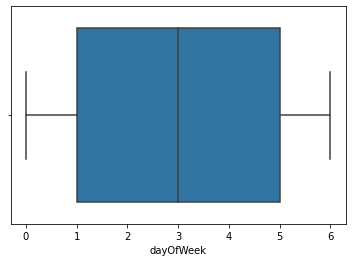

In [50]:
sns.boxplot(x=autolib['dayOfWeek'])

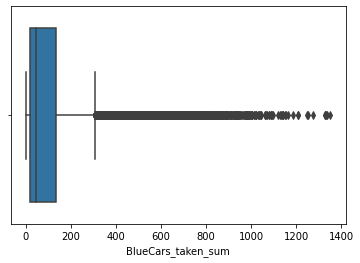

In [46]:
sns.boxplot(x=autolib['BlueCars_taken_sum'])

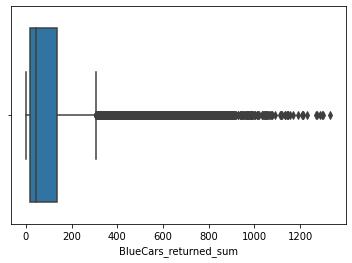

In [47]:
sns.boxplot(x=autolib['BlueCars_returned_sum'])

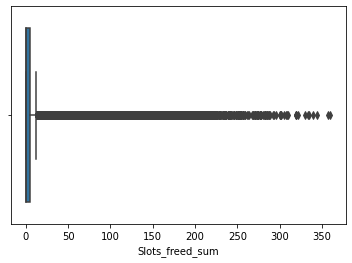

In [184]:
sns.boxplot(x=autolib['Slots_freed_sum'])

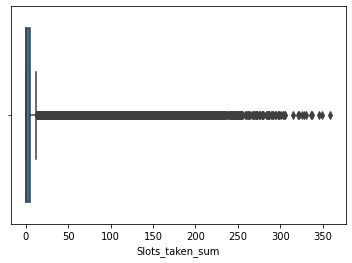

In [185]:
sns.boxplot(x=autolib['Slots_taken_sum'])

In [22]:
#declaring the thresholds for the values in the bluecars returned column using quantiles.
bc_returned_min_threshold, bc_returned_max_threshold = autolib.BlueCars_returned_sum.quantile([0.001, 0.999])
bc_returned_min_threshold, bc_returned_max_threshold

(0.0, 1141.4960000000065)

In [23]:
#declaring the thresholds for the values in the bluecars taken column using quantiles.
bc_taken_min_threshold, bc_taken_max_threshold = autolib.BlueCars_taken_sum.quantile([0.001, 0.999])
bc_taken_min_threshold, bc_taken_max_threshold

(0.0, 1135.6640000000043)

In [186]:
#creating a new dataset after removing the outliers by the method of quantiles.
#viewing the rows and columns remaining.
autolib_1 = autolib[(autolib.BlueCars_returned_sum<bc_returned_max_threshold) & (autolib.BlueCars_returned_sum>bc_returned_min_threshold) & (autolib.BlueCars_taken_sum<bc_taken_max_threshold) & (autolib.BlueCars_taken_sum>bc_taken_min_threshold)]
autolib_1.shape

(15974, 7)

In [201]:
#creating a new dataset that contains information about our days of interest. Monday and Sunday.
#viewing the rows and columns present.
days=[0,6]
autolib_2 = autolib_1[autolib_1['dayOfWeek'].isin(days)]
autolib_2.shape

(4623, 7)

In [188]:
autolib_2.head()

,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Slots_freed_sum,Slots_taken_sum
0,1/1/2018,0,weekday,110,103,22,20
6,1/7/2018,6,weekend,180,180,34,34
7,1/8/2018,0,weekday,84,83,14,15
13,1/14/2018,6,weekend,193,193,22,20
14,1/15/2018,0,weekday,107,107,15,15


In [189]:
#loadig the libraries for the statistics to be done.
import math
from scipy import stats
from scipy.stats import norm

In [190]:
#performing the stratified sampling to create a new sample for the hypothesis testing.
autolib_strat = autolib_2.groupby('dayOfWeek', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.5))
autolib_strat.shape

(2311, 7)

In [151]:
#declaring the significance level
significance_level = 0.05

In [191]:
#calculating the population mean
mean = autolib_2['BlueCars_returned_sum'].mean()
print("Population mean is: ",mean)

Population mean is:  129.26346528228424


In [192]:
#calculating the sample mean
sample_mean = autolib_strat['BlueCars_returned_sum'].mean()
print("Sample mean is: ",sample_mean)

Sample mean is:  128.19212462137602


In [193]:
#calculating the sample standard deviation
sample_st_dev=autolib_strat['BlueCars_returned_sum'].std()
print("Sample Standard deviation is: ",sample_st_dev)

Sample Standard deviation is:  180.59071025551745


In [194]:
#calculating the square-root for the sample size
sqr_n = math.sqrt(1819)
print("Sample size squareroot is: ",sqr_n)

Sample size squareroot is:  42.649736224272246


In [195]:
#calculating the z-score
z_score = ((mean-sample_mean)/(sample_st_dev/sqr_n))
print("The z-score is: ",z_score)

The z-score is:  0.25301631811195047


In [196]:
#calculating the p-value
p_value = 1 - stats.norm.cdf(z_score)
print("The p-value is: ",p_value)

The p-value is:  0.4001278016768607


In [197]:
#creatig a condition to know whether to accept or reject the null hypothesis.
if p_value > significance_level:
  print("The null hypothesis is to be accepted")
else:
  print("The null hypothesis is to be rejected")

The null hypothesis is to be accepted


In [198]:
#calculating the standard error of the mean
sem = (sample_mean/sqr_n)
print("The Standard Error of the mean is: ",sem)

The Standard Error of the mean is:  3.005695602600727


In [200]:
#calculating the confidence interval.
conf_int = (1.96 * sem)
rint("Employing a 95% value, the confidence interval will be: 128.19 +/-", conf_int)

Employing a 95% value, the confidence interval will be: 128.19 +/- 5.891163381097424


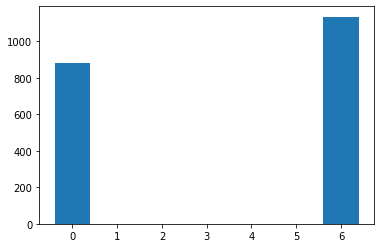

In [206]:
#plotting a bar graph so as to confirming that my null hypothesis is true in order to validate my hypothesis testing results.
plt.bar(autolib_2.dayOfWeek, autolib_2.BlueCars_returned_sum)
plt.show()